In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.ensemble import IsolationForest

In [110]:
def train_model(model,train_dataset,batch_size = 10000):        
    print("training start")
    before = 0
    for i in range(batch_size,len(train_dataset),batch_size):
        model.fit(train_dataset[before:i])
        print(i / len(train_dataset))
        before = i

In [3]:
tmp = pd.read_csv('combined_dataset.csv', encoding = 'cp949')

In [4]:
tmp.head(5)

,Unnamed: 0,time,motor,pump
0,0,2022-03-10 오전 9:55:29,0.560187,1.988296
1,1,2022-03-10 오전 9:55:29,1.423991,-1.985625
2,2,2022-03-10 오전 9:55:29,-1.454646,-0.822700
3,3,2022-03-10 오전 9:55:29,2.120655,-3.767544
4,4,2022-03-10 오전 9:55:29,-1.437091,1.287651


In [5]:
#기존 데이터 시각회
#sns.scatterplot(x='motor', y='pump', data=tmp)

In [112]:
values = tmp.iloc[:,2:]

In [113]:
#values = tmp.drop(['Unnamed: 0','time'], axis=1).to_numpy() #필요없는 라벨 떨어뜨리기

In [114]:
#scaling

#min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
#values = min_max_scaler.fit_transform(values)
values = standard_scaler.fit_transform(values)

In [115]:
rng = np.random.RandomState(42)

margin_max = 1
margin_min = 0.85
num_abnormals = 125
# 고장 데이터 생성
X_outliers_top = np.stack((rng.uniform(low=0, high=1, size=(num_abnormals)), rng.uniform(low=margin_min, high=margin_max, size=(num_abnormals))), axis=1)
X_outliers_bottom = np.stack((rng.uniform(low=0, high=1, size=(num_abnormals)), rng.uniform(low=1-margin_max, high=1-margin_min, size=(num_abnormals))), axis=1)

X_outliers_left = np.stack((rng.uniform(low=1-margin_max, high=1-margin_min, size=(num_abnormals)), rng.uniform(low=0, high=margin_max, size=(num_abnormals))), axis=1)
X_outliers_right = np.stack((rng.uniform(low=margin_min, high=margin_max, size=(num_abnormals)), rng.uniform(low=0, high=1, size=(num_abnormals))), axis=1)

X_outliers = np.concatenate((X_outliers_top,X_outliers_bottom,X_outliers_left,X_outliers_right))

X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

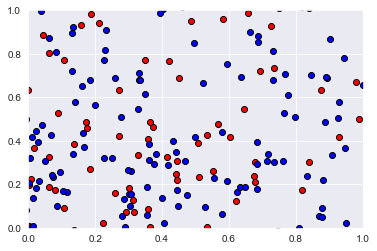

In [116]:
plt.axis([0,1,0,1])
plt.scatter(values[:1000,0], values[:1000,1], c='red', edgecolor='k', label='1')
plt.scatter(values[10000:11000,0], values[10000:11000,1], c='blue', edgecolor='k', label='2')
#plt.scatter(values[2000:3000,0], values[2000:3000,1], c='green', edgecolor='k', label='3')
#plt.scatter(values[3000:4000,0], values[3000:4000,1], c='yellow', edgecolor='k', label='4')

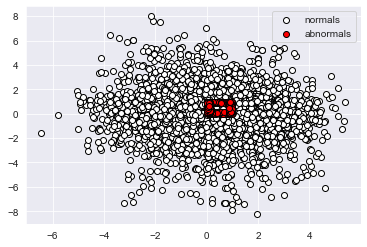

In [118]:
plt.scatter(values[:5000,0], values[:5000,1], c='white', edgecolor='k', label='normals')
plt.scatter(X_outliers.x1, X_outliers.x2, c='red', edgecolor='k', label='abnormals')
plt.legend()

In [131]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)

In [132]:
train_dataset = values[:,0].reshape(-1,1)

In [133]:
before = 0
for i in range(100000,len(train_dataset),100000):
    clf.fit(train_dataset[before:i])
    print(i / len(train_dataset))
    before = i

0.000660433447358709
0.001320866894717418
0.001981300342076127
0.002641733789434836
0.0033021672367935452
0.003962600684152254
0.004623034131510963
0.005283467578869672
0.005943901026228381
0.0066043344735870904
0.0072647679209458
0.007925201368304508
0.008585634815663217
0.009246068263021927
0.009906501710380636
0.010566935157739344
0.011227368605098053
0.011887802052456762
0.012548235499815472
0.013208668947174181
0.01386910239453289
0.0145295358418916
0.015189969289250307
0.015850402736609016
0.016510836183967727
0.017171269631326435
0.017831703078685143
0.018492136526043854
0.01915256997340256
0.019813003420761272
0.02047343686811998
0.021133870315478687
0.0217943037628374
0.022454737210196106
0.023115170657554817
0.023775604104913525
0.024436037552272236
0.025096470999630943
0.02575690444698965
0.026417337894348362
0.02707777134170707
0.02773820478906578
0.028398638236424488
0.0290590716837832
0.029719505131141907
0.030379938578500614
0.031040372025859325
0.03170080547321803
0.032

0.27275901375914685
0.2734194472065055
0.27407988065386424
0.27474031410122296
0.2754007475485817
0.27606118099594035
0.27672161444329907
0.2773820478906578
0.2780424813380165
0.27870291478537523
0.2793633482327339
0.2800237816800926
0.28068421512745134
0.28134464857481006
0.28200508202216873
0.28266551546952745
0.28332594891688617
0.2839863823642449
0.2846468158116036
0.2853072492589623
0.285967682706321
0.2866281161536797
0.28728854960103845
0.2879489830483971
0.28860941649575583
0.28926984994311455
0.2899302833904733
0.290590716837832
0.29125115028519066
0.2919115837325494
0.2925720171799081
0.2932324506272668
0.2938928840746255
0.2945533175219842
0.29521375096934294
0.29587418441670166
0.2965346178640604
0.29719505131141905
0.29785548475877777
0.2985159182061365
0.2991763516534952
0.2998367851008539
0.3004972185482126
0.3011576519955713
0.30181808544293004
0.30247851889028876
0.3031389523376474
0.30379938578500615
0.30445981923236487
0.3051202526797236
0.30578068612708226
0.3064411

0.5534432288865981
0.5541036623339569
0.5547640957813156
0.5554245292286742
0.556084962676033
0.5567453961233917
0.5574058295707505
0.5580662630181091
0.5587266964654678
0.5593871299128266
0.5600475633601852
0.560707996807544
0.5613684302549027
0.5620288637022613
0.5626892971496201
0.5633497305969788
0.5640101640443375
0.5646705974916962
0.5653310309390549
0.5659914643864137
0.5666518978337723
0.567312331281131
0.5679727647284898
0.5686331981758485
0.5692936316232072
0.5699540650705659
0.5706144985179246
0.5712749319652833
0.571935365412642
0.5725957988600008
0.5732562323073594
0.5739166657547181
0.5745770992020769
0.5752375326494356
0.5758979660967942
0.576558399544153
0.5772188329915117
0.5778792664388704
0.5785396998862291
0.5792001333335878
0.5798605667809466
0.5805210002283052
0.581181433675664
0.5818418671230227
0.5825023005703813
0.5831627340177401
0.5838231674650988
0.5844836009124575
0.5851440343598162
0.5858044678071749
0.5864649012545337
0.5871253347018923
0.587785768149251


0.8407317784876366
0.8413922119349954
0.842052645382354
0.8427130788297127
0.8433735122770715
0.8440339457244301
0.8446943791717888
0.8453548126191476
0.8460152460665062
0.846675679513865
0.8473361129612237
0.8479965464085824
0.8486569798559411
0.8493174133032998
0.8499778467506586
0.8506382801980172
0.8512987136453759
0.8519591470927347
0.8526195805400933
0.853280013987452
0.8539404474348108
0.8546008808821695
0.8552613143295282
0.8559217477768869
0.8565821812242456
0.8572426146716043
0.857903048118963
0.8585634815663218
0.8592239150136805
0.8598843484610391
0.8605447819083979
0.8612052153557566
0.8618656488031153
0.862526082250474
0.8631865156978327
0.8638469491451914
0.8645073825925501
0.8651678160399088
0.8658282494872676
0.8664886829346262
0.867149116381985
0.8678095498293437
0.8684699832767023
0.8691304167240611
0.8697908501714198
0.8704512836187785
0.8711117170661372
0.8717721505134959
0.8724325839608547
0.8730930174082133
0.8737534508555721
0.8744138843029308
0.8750743177502894

In [62]:
clf.fit(values[:,1].reshape(-1,1))

IsolationForest(contamination=0.1, max_samples=100, random_state=42)

In [134]:
X_test = pd.DataFrame(values[1000:2000,0], columns = ['x1'])
anomaly_scores = clf.decision_function(X_test).reshape(-1,1)

In [135]:
outliers = clf.decision_function(X_outliers.to_numpy().reshape(-1,1))

In [136]:
anomaly_scores = pd.DataFrame(anomaly_scores.reshape(-1) ,columns=['x1'])

In [137]:
outliers = pd.DataFrame(outliers.reshape(-1) ,columns=['x1'])

In [138]:
anomaly_scores.describe()

,x1
count,1000.000000
mean,-0.164125
std,0.017651
min,-0.177997
25%,-0.177997
50%,-0.151853
75%,-0.151853
max,0.097405


In [139]:
outliers.describe()

,x1
count,1000.000000
mean,-0.148245
std,0.027411
min,-0.151853
25%,-0.151853
50%,-0.151853
75%,-0.151853
max,0.130989


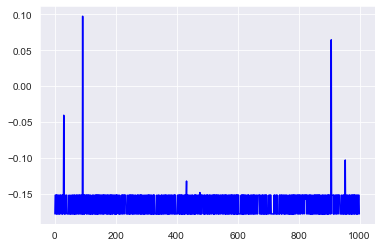

In [140]:
plt.plot(anomaly_scores.index,
         anomaly_scores,
          color='blue', label="normal")

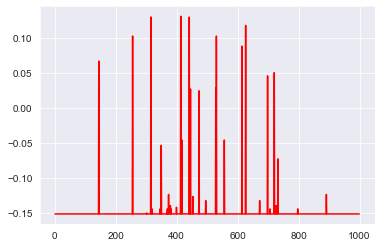

In [141]:
plt.plot(outliers.index,
         outliers,
          color='red', label="anomaly")


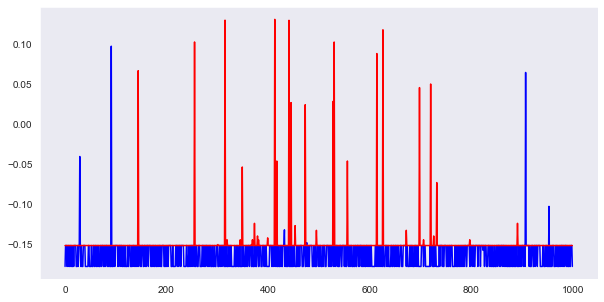

In [142]:
plt.figure(figsize=(10,5))

plt.plot(anomaly_scores.index,
         anomaly_scores,
          color='blue', label="normal")

plt.plot(outliers.index,
         outliers,
          color='red', label="anomaly")


plt.grid()

In [ ]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데dd이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

In [ ]:
p2 = plt.scatter(X_test.loc[y_pred_test == -1, ['x1']], 
                 X_test.loc[y_pred_test == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_test.loc[y_pred_test == 1, ['x1']], 
                 X_test.loc[y_pred_test == 1, ['x2']], 
                 c='white', s=20*4, edgecolor='k', label="detected regular obs")

plt.legend()

from sklearn.cluster import KMeans
#1군집이 정상이고 2군집이 이상치로 생각한뒤 군집화 근데 잘 안됨
kmeans = KMeans(n_clusters=2).fit(x_train_minmax)

# K=2 군집화 결과  
sns.scatterplot(x=x_train_minmax[:,0], y=x_train_minmax[:,1], data=x_train_minmax, hue=kmeans.labels_,palette='coolwarm')

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=1)

ssignment = agg.fit_predict(values[:1000])

import matplotlib.pyplot as plt
plt.scatter(ssignment[:1000,0], ssignment[:1000,1], s=3, c=agg.labels_, label="n_cluster-1")

sns.scatterplot(x=x_train_minmax[:,0], y=x_train_minmax[:,1], data=x_train_minmax)

In [55]:
import joblib
joblib.dump(clf, 'IF_Model_20220406_pump_minmax_v1.pkl') 

['IF_Model_20220406_motor_minmax_v1.pkl']

In [57]:
joblib.dump(min_max_scaler, 'IF_MinMaxScaler_20220406_pump_minmax_v1.pkl') 

['IF_MinMaxScaler_20220406_motor_minmax_v1.pkl']